In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
#讀取資料
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#列出所有項目
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


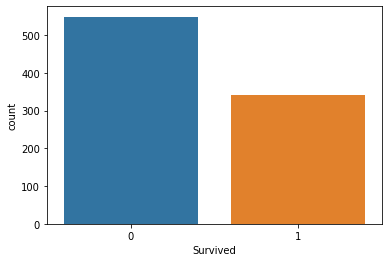

In [71]:
#存活比
sns.countplot(data['Survived'])

,Pclass,Survived
0,1,0.63
1,2,0.47
2,3,0.24


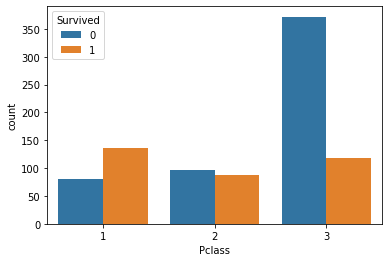

In [72]:
#存活與艙等的比較
sns.countplot(data['Pclass'],hue=data['Survived'])
display(data[["Pclass", "Survived"]].groupby(['Pclass'], 
        as_index=False).mean().round(2))

,Sex,Survived
0,female,0.74
1,male,0.19


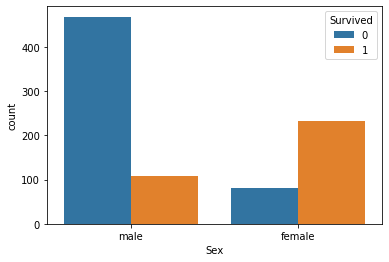

In [73]:
#存活與性別的比較
sns.countplot(data['Sex'],hue=data['Survived'])
display(data[["Sex", "Survived"]].groupby(['Sex'], 
        as_index=False).mean().round(2))

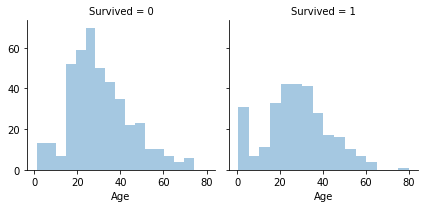

In [74]:
#存活與年齡的比較
age = sns.FacetGrid(data, col='Survived')
age.map(sns.distplot, 'Age', kde=False)

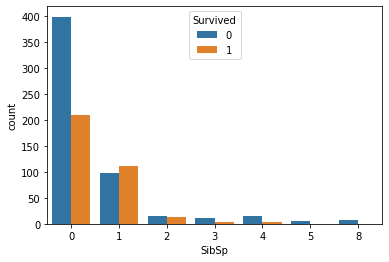

In [75]:
#存活與堂兄弟妹的比較
sns.countplot(data['SibSp'],hue=data['Survived'])

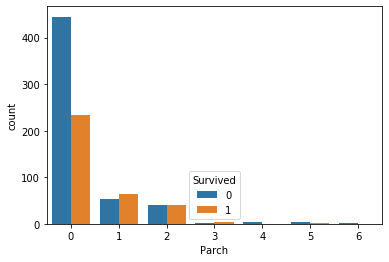

In [76]:
#存活與父母與小孩的比較
sns.countplot(data['Parch'],hue=data['Survived'])

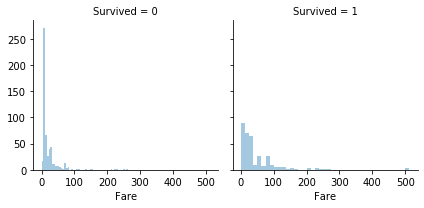

In [77]:
#存活與票價的比較
age = sns.FacetGrid(data, col='Survived')
age.map(sns.distplot, 'Fare', kde=False)

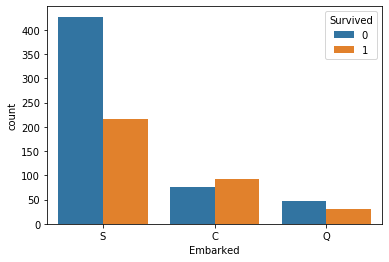

In [78]:
#存活與登入港口的比較
sns.countplot(data['Embarked'],hue=data['Survived'])

In [79]:
#選擇這五個特徵做訓練和測試
feature=['Pclass','Sex','SibSp','Parch','Embarked']
xtrain=data[feature]
xtest=test[feature]
ytrain=data['Survived']

In [80]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: int64(3), object(2)
memory usage: 34.9+ KB


In [81]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass      418 non-null int64
Sex         418 non-null object
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: int64(3), object(2)
memory usage: 16.5+ KB


In [82]:
xtrain['Embarked'].fillna('S',inplace=True)
xtest['Embarked'].fillna('S',inplace=True)
from sklearn.feature_extraction import DictVectorizer
dvec=DictVectorizer(sparse=False)
xtrain=dvec.fit_transform(xtrain.to_dict(orient='record'))
xtest=dvec.transform(xtest.to_dict(orient='record'))
print (dvec.feature_names_)

['Embarked=C', 'Embarked=Q', 'Embarked=S', 'Parch', 'Pclass', 'Sex=female', 'Sex=male', 'SibSp']


D:\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model  import LogisticRegression
# 支援向量機
svc = SVC()
# 決策樹
decC = DecisionTreeClassifier()
# 隨機森林
ranC = RandomForestClassifier()
# 邏輯迴歸
logR = LogisticRegression()

In [84]:
print ('SVM :', np.mean(cross_val_score(svc, xtrain, ytrain, cv=10)).round(5))
print ('DecisionTree :', np.mean(cross_val_score(decC, xtrain, ytrain, cv=10)).round(5))
print ('RandomForest :', np.mean(cross_val_score(ranC, xtrain, ytrain, cv=10)).round(5))
print ('LogisticRegression :', np.mean(cross_val_score(logR, xtrain, ytrain, cv=10)).round(5))

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

SVM : 0.80695
DecisionTree : 0.79687


D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

RandomForest : 0.78691
LogisticRegression : 0.78453


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
# 訓練
logR.fit(xtrain, ytrain)
# 預測
ypredict = logR.predict(xtest)
# 儲存結果
result = {'PassengerId': test['PassengerId'],
'Survived': ypredict}
result = pd.DataFrame(result)
result.to_csv('submission.csv',index=False)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
# 訓練
ranC.fit(xtrain, ytrain)
# 預測
ypredict2 = ranC.predict(xtest)
# 儲存結果
result2 = {'PassengerId': test['PassengerId'],
'Survived': ypredict2}
result2 = pd.DataFrame(result)
result2.to_csv('submission.csv',index=False)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [88]:
result2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
family         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


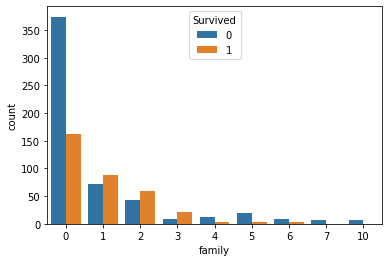

In [89]:
data['family']=data['SibSp']+data['Parch']
test['family']=test['SibSp']+test['Parch']
sns.countplot(data['family'],hue=data['Survived'])
data.info()


In [96]:
#選擇這五個特徵做訓練和測試
feature2=['Pclass','Sex','family','Embarked','Ticket']
xtrain2=data[feature2]
xtest2=test[feature2]
ytrain2=data['Survived']

In [97]:
xtrain2['Embarked'].fillna('S',inplace=True)
xtest2['Embarked'].fillna('S',inplace=True)
from sklearn.feature_extraction import DictVectorizer
dvec=DictVectorizer(sparse=False)
xtrain2=dvec.fit_transform(xtrain2.to_dict(orient='record'))
xtest2=dvec.transform(xtest2.to_dict(orient='record'))
print (dvec.feature_names_)

['Embarked=C', 'Embarked=Q', 'Embarked=S', 'Pclass', 'Sex=female', 'Sex=male', 'Ticket=110152', 'Ticket=110413', 'Ticket=110465', 'Ticket=110564', 'Ticket=110813', 'Ticket=111240', 'Ticket=111320', 'Ticket=111361', 'Ticket=111369', 'Ticket=111426', 'Ticket=111427', 'Ticket=111428', 'Ticket=112050', 'Ticket=112052', 'Ticket=112053', 'Ticket=112058', 'Ticket=112059', 'Ticket=112277', 'Ticket=112379', 'Ticket=113028', 'Ticket=113043', 'Ticket=113050', 'Ticket=113051', 'Ticket=113055', 'Ticket=113056', 'Ticket=113059', 'Ticket=113501', 'Ticket=113503', 'Ticket=113505', 'Ticket=113509', 'Ticket=113510', 'Ticket=113514', 'Ticket=113572', 'Ticket=113760', 'Ticket=113767', 'Ticket=113773', 'Ticket=113776', 'Ticket=113781', 'Ticket=113783', 'Ticket=113784', 'Ticket=113786', 'Ticket=113787', 'Ticket=113788', 'Ticket=113789', 'Ticket=113792', 'Ticket=113794', 'Ticket=113796', 'Ticket=113798', 'Ticket=113800', 'Ticket=113803', 'Ticket=113804', 'Ticket=113806', 'Ticket=113807', 'Ticket=11668', 'Tic

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [98]:
print ('SVM :', np.mean(cross_val_score(svc, xtrain2, ytrain2, cv=10)).round(5))
print ('DecisionTree :', np.mean(cross_val_score(decC, xtrain2, ytrain2, cv=10)).round(5))
print ('RandomForest :', np.mean(cross_val_score(ranC, xtrain2, ytrain2, cv=10)).round(5))
print ('LogisticRegression :', np.mean(cross_val_score(logR, xtrain2, ytrain2, cv=10)).round(5))

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

SVM : 0.78686
DecisionTree : 0.83057
RandomForest : 0.82373
LogisticRegression : 0.80471


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklea

In [100]:
# 訓練
logR.fit(xtrain2, ytrain2)
# 預測
ypredict3 = logR.predict(xtest2)
# 儲存結果
result3 = {'PassengerId': test['PassengerId'],
'Survived': ypredict3}
result3 = pd.DataFrame(result3)
result3.to_csv('submission.csv',index=False)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [101]:
result3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [102]:
# 訓練
ranC.fit(xtrain2, ytrain2)
# 預測
ypredict4 = ranC.predict(xtest2)
# 儲存結果
result4 = {'PassengerId': test['PassengerId'],
'Survived': ypredict4}
result4 = pd.DataFrame(result4)
result4.to_csv('submission.csv',index=False)

In [103]:
result4

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
